In [1]:
%%javascript
// Notebook style configuration
require.config({paths: {toc: "//rawgit.com/rweigel/js-rsw/master/jupyter/toc"}});require(["toc"]);

<IPython.core.display.Javascript object>

In [2]:
# Notebook plot style configuration
%config InlineBackend.figure_format = 'svg'

# Show plots in page instead of opening a window
%matplotlib inline

The Heliophysics Application Programmer’s Interface (HAPI) data access specification is a RESTful API and streaming format specification for delivering digital time series data.

This notebook demonstrates the features of a Python client that accesses data from HAPI-compliant data servers.

To use this notebook locally

1. [Install Anaconda](https://www.anaconda.com/download/) for Python 3
2. On command line enter 

```bash
which pip # Output should contain a directory path with "anaconda3"
pip install hapiclient # Install hapiclient package
curl -L -O https://rawgithub.com/hapi-server/client-python/master/hapi_demo.ipynb
jupyter-notebook hapi_demo.ipynb # Launches browser window
```

To test code in this notebook, click on a code area, edit, and hit `SHIFT-ENTER` to execute.

For more information on HAPI-related software, see http://hapi-server.org/.

# Display documentation

In [3]:
from hapiclient.hapi import hapi
help(hapi)

Help on function hapi in module hapiclient.hapi:

hapi(*args, **kwargs)
    Request data from a HAPI server.
    
    For additional documentation and demonstration, see
    <https://github.com/hapi-server/client-python/blob/master/hapi_demo.ipynb>
    
    Version: 0.0.6
    
    Parameters
    ----------
    server : str
        A string with the url to the HAPI compliant server. A HAPI URL
        always ends with "/hapi".
    dataset : str
        A string specifying a dataset from a server
    parameters: str
        Comma-separated list of parameters in dataset
    start_time: str
        The start time of the requested data
    end_time: str
        The end time of the requested data; end times are exclusive - the
        last data record returned by a HAPI server should be before the
        given end_time.
    options : dict
        The following options are available.
            logging (False) - Log to console
            cache (True) - Save responses and processed response

# Examples

## OMNIWeb data

TBD. This data is available from CDAWeb's non-HAPI API, but not through their HAPI interface yet. A request has been put into to make it available.

## SSCWeb data

hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file directory = hapi-server.org_servers_SSCWeb_hapi
hapi(): Reading http://hapi-server.org/servers/SSCWeb/hapi/info?id=ace
hapi(): Writing ace.json 
hapi(): Writing ace.pkl 
hapi(): Reading http://hapi-server.org/servers/SSCWeb/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/SSCWeb/hapi/data?id=ace&parameters=X_GSE,Y_GSE,Z_GSE&time.min=2001-01-01T05:00:00&time.max=2001-01-01T06:00:00&format=binary to ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.bin
hapi(): Reading ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.bin
hapi(): Writing hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.pkl
hapi(): Writing hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.npy


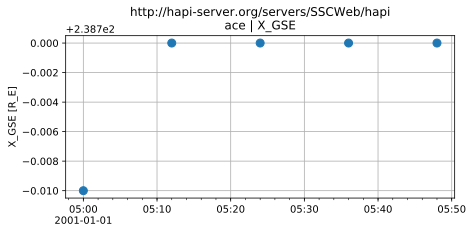

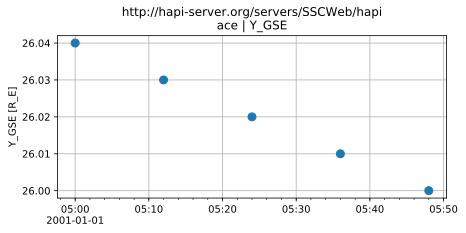

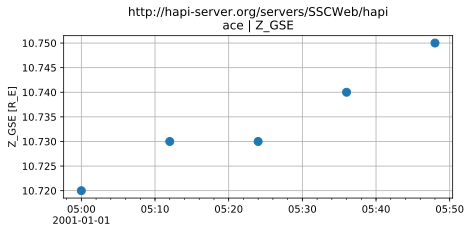

In [4]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'http://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'ace'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'X_GSE,Y_GSE,Z_GSE'
opts       = {'logging': True, 'usecache': False}

# Get data
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot all parameters
hapiplot(data, meta)

## CDAWeb data

hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file directory = cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.pkl
hapi(): Reading AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.npy 


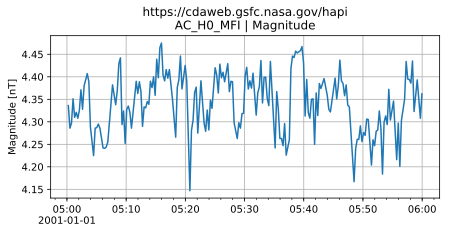

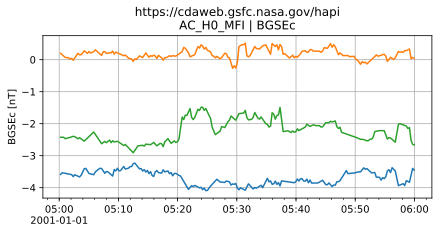

In [5]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True, 'usecache': True}

# Get data
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot everything
hapiplot(data, meta)

## CASSINI

In [1]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'http://datashop.elasticbeanstalk.com/hapi';
dataset    = 'CHEMS_PHA_BOX_FLUXES_FULL_TIME_RES';
parameters = 'HPlus_BEST_T1';
start      = '2004-07-01T04:00:00Z';
stop       = '2004-07-01T06:00:00Z';
opts       = {'usecache': True}

data,meta = hapi(server, dataset, parameters, start, stop, **opts)

popts = {'logging': False, 'dpi': 100, 'hmkwargs': {'logy': True, 'logz': True}}
hapiplot(data, meta, **popts)

Warning in hapiplot.py: Time values are not uniformly spaced. Bin width for time will be based on time separation of consecutive time values.


heatmap() warning: Only bin centers given for x and bin separation distance is not constant. Bin width assumed based on separation distance and data pickers will not work properly.


## Extracting data

In [2]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True, 'usecache': True}    
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Extract time values as datetime objects
from hapiclient import hapitime2datetime

dateTimes = hapitime2datetime(data['Time'])
print("\ndateTimes = ")
display(dateTimes)

# Extract one of the parameters
X_GSE = data['X_GSE']
print("\nX_GSE =")
display(X_GSE)

hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file directory = cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.pkl
hapi(): Reading AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.npy 

dateTimes = 


array([datetime.datetime(2001, 1, 1, 5, 0, 14),
       datetime.datetime(2001, 1, 1, 5, 0, 30),
       datetime.datetime(2001, 1, 1, 5, 0, 46),
       datetime.datetime(2001, 1, 1, 5, 1, 2),
       datetime.datetime(2001, 1, 1, 5, 1, 18),
       datetime.datetime(2001, 1, 1, 5, 1, 34),
       datetime.datetime(2001, 1, 1, 5, 1, 50),
       datetime.datetime(2001, 1, 1, 5, 2, 6),
       datetime.datetime(2001, 1, 1, 5, 2, 22),
       datetime.datetime(2001, 1, 1, 5, 2, 38),
       datetime.datetime(2001, 1, 1, 5, 2, 54),
       datetime.datetime(2001, 1, 1, 5, 3, 10),
       datetime.datetime(2001, 1, 1, 5, 3, 26),
       datetime.datetime(2001, 1, 1, 5, 3, 42),
       datetime.datetime(2001, 1, 1, 5, 3, 58),
       datetime.datetime(2001, 1, 1, 5, 4, 14),
       datetime.datetime(2001, 1, 1, 5, 4, 30),
       datetime.datetime(2001, 1, 1, 5, 4, 46),
       datetime.datetime(2001, 1, 1, 5, 5, 2),
       datetime.datetime(2001, 1, 1, 5, 5, 18),
       datetime.datetime(2001, 1, 1, 5, 5, 

ValueError: no field of name X_GSE

# Data Model

A request for data of the form
```
data, meta = hapi(server, dataset, parameters, start, stop)
```
returns the [Numpy N-D array](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html) `data` and a Python dictionary `meta` from a HAPI-compliant data server `server`. The structure of `meta` mirrors the structure of the metadata response from a HAPI server.

The basic data structure returned by all HAPI servers is a CSV file in which the first column is a time stamp and subsequent columns are data measured or associated with that time stamp. The columns are mapped to one or more parameters (that may be multi-dimensional arrays) using the metadata associated with the request for CSV data.

For more information on the HAPI server specification, see https://github.com/hapi-server/data-specification. Note that `hapi.py` requests HAPI Binary from a server if that feature is available; a HAPI compliant server is only required to serve HAPI CSV.

## Extracting Data

In [3]:
from hapiclient.hapi import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

`data` is a Numpy N-D array with named fields `Time`, `scalar`, and `vector`. The array has 10 elements (one for each time value) and each element is a list.

In [4]:
data

array([(b'1970-01-01T00:00:00.000Z', 0.        , [ 0.        , -0.70710678, -1.        ]),
       (b'1970-01-01T00:00:01.000Z', 0.00523596, [ 0.00523596, -0.7033947 , -0.99998629]),
       (b'1970-01-01T00:00:02.000Z', 0.01047178, [ 0.01047178, -0.69966334, -0.99994517]),
       (b'1970-01-01T00:00:03.000Z', 0.01570732, [ 0.01570732, -0.6959128 , -0.99987663]),
       (b'1970-01-01T00:00:04.000Z', 0.02094242, [ 0.02094242, -0.69214317, -0.99978068]),
       (b'1970-01-01T00:00:05.000Z', 0.02617695, [ 0.02617695, -0.68835458, -0.99965732]),
       (b'1970-01-01T00:00:06.000Z', 0.03141076, [ 0.03141076, -0.68454711, -0.99950656]),
       (b'1970-01-01T00:00:07.000Z', 0.03664371, [ 0.03664371, -0.68072087, -0.99932839]),
       (b'1970-01-01T00:00:08.000Z', 0.04187565, [ 0.04187565, -0.67687597, -0.99912283]),
       (b'1970-01-01T00:00:09.000Z', 0.04710645, [ 0.04710645, -0.67301251, -0.99888987])],
      dtype=[('Time', 'S24'), ('scalar', '<f8'), ('vector', '<f8', (3,))])

Access all values for parameter `Time`

In [5]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

Convert elements of `Time` to Python `datetime` objects

In [6]:
from hapiclient.hapi import hapitime2datetime
dateTime = hapitime2datetime(data['Time'])
dateTime

array([datetime.datetime(1970, 1, 1, 0, 0),
       datetime.datetime(1970, 1, 1, 0, 0, 1),
       datetime.datetime(1970, 1, 1, 0, 0, 2),
       datetime.datetime(1970, 1, 1, 0, 0, 3),
       datetime.datetime(1970, 1, 1, 0, 0, 4),
       datetime.datetime(1970, 1, 1, 0, 0, 5),
       datetime.datetime(1970, 1, 1, 0, 0, 6),
       datetime.datetime(1970, 1, 1, 0, 0, 7),
       datetime.datetime(1970, 1, 1, 0, 0, 8),
       datetime.datetime(1970, 1, 1, 0, 0, 9)], dtype=object)

Access all values for parameter `vector`

In [7]:
data['vector']

array([[ 0.        , -0.70710678, -1.        ],
       [ 0.00523596, -0.7033947 , -0.99998629],
       [ 0.01047178, -0.69966334, -0.99994517],
       [ 0.01570732, -0.6959128 , -0.99987663],
       [ 0.02094242, -0.69214317, -0.99978068],
       [ 0.02617695, -0.68835458, -0.99965732],
       [ 0.03141076, -0.68454711, -0.99950656],
       [ 0.03664371, -0.68072087, -0.99932839],
       [ 0.04187565, -0.67687597, -0.99912283],
       [ 0.04710645, -0.67301251, -0.99888987]])

Access first element (all parameters at first time)

In [8]:
data[0]

(b'1970-01-01T00:00:00.000Z', 0., [ 0.        , -0.70710678, -1.        ])

Access value of `vector` at second timestep.

In [9]:
data['vector'][1] 

array([ 0.00523596, -0.7033947 , -0.99998629])

Access value of second component of `vector` at second timestep

In [10]:
data['vector'][1,1]

-0.7033947028105039

## Time Representation

A HAPI-compliant server represents time as an ISO 8601 string (with several constraints - see the [HAPI specification](https://github.com/hapi-server/data-specification/blob/master/hapi-dev/HAPI-data-access-spec-dev.md#representation-of-time)). `hapi.py` reads these into a NumPy array of [Python byte literals](https://stackoverflow.com/a/6273618). To convert byte literals to Python `datetime` objects, the function [`hapitime2datetime`](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapi.py) can be used. Internally, this function uses `pandas.to_datetime` for parsing if possible. Otherwise it falls back to a manual method for parsing. The byte literals can also be converted to Astropy time objects as shown below.

In [11]:
from hapiclient.hapi import hapi
from hapiclient.hapi import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server, dataset, parameters, start, stop)

In [12]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

In [13]:
hapitime2datetime(data['Time'])

array([datetime.datetime(1970, 1, 1, 0, 0),
       datetime.datetime(1970, 1, 1, 0, 0, 1),
       datetime.datetime(1970, 1, 1, 0, 0, 2),
       datetime.datetime(1970, 1, 1, 0, 0, 3),
       datetime.datetime(1970, 1, 1, 0, 0, 4),
       datetime.datetime(1970, 1, 1, 0, 0, 5),
       datetime.datetime(1970, 1, 1, 0, 0, 6),
       datetime.datetime(1970, 1, 1, 0, 0, 7),
       datetime.datetime(1970, 1, 1, 0, 0, 8),
       datetime.datetime(1970, 1, 1, 0, 0, 9)], dtype=object)

In [14]:
from astropy.time import Time
Time(data['Time'])

<Time object: scale='utc' format='isot' value=['1970-01-01T00:00:00.000' '1970-01-01T00:00:01.000'
 '1970-01-01T00:00:02.000' '1970-01-01T00:00:03.000'
 '1970-01-01T00:00:04.000' '1970-01-01T00:00:05.000'
 '1970-01-01T00:00:06.000' '1970-01-01T00:00:07.000'
 '1970-01-01T00:00:08.000' '1970-01-01T00:00:09.000']>

The datetime objects are not timezone aware; all HAPI times are UTC and it seems that UTC is generally assumed by Python libraries if no timezone information is given. One known exception is when converting to Unix time.

In [15]:
dateTimes = hapitime2datetime(data['Time'])
dateTimes[0].timestamp() # 0.0 is expected but result is given in local timezone

18000.0

In [16]:
from datetime import timezone
dateTimesUTCAware = [dt.replace(tzinfo=timezone.utc) for dt in dateTimes]
dateTimesUTCAware[0].timestamp() # 0.00
# See https://stackoverflow.com/a/41624199 for Python 2.7

0.0

## Generating Data

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.
1970-01-01T00:00:02.000Z, 4.,5.,6.
```

where the metadata indicates there is one parameter named `vector` with `size=[3]` and `type=double` could be created by

In [17]:
import numpy as np
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

# Populate: method 1
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])

# Populate: method 2
data[0] = (b'1970-01-01T00:00:00.000Z', [1.0,2.0,3.0])
data[1] = (b'1970-01-01T00:00:01.000Z', [4.0,5.0,6.0])

data

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 11.,12.,13.,14.,15.,16.,17.,18.,19.
```
where the metadata indicates there is one parameter named `matrix` with `size=[3,3]` and `type=double` could be created by

In [18]:
import numpy as np

# Allocate
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('matrix', '<f8', (3,3,))])

# Populate
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )

data

array([(b'1970-01-01T00:00:00.000Z', [[ 1.,  2.,  3.], [ 4.,  5.,  6.], [ 7.,  8.,  9.]]),
       (b'1970-01-01T00:00:01.000Z', [[11., 12., 13.], [14., 15., 16.], [17., 18., 19.]])],
      dtype=[('Time', 'S24'), ('matrix', '<f8', (3, 3))])

Multiple parameters, e.g. a response with both the vector and matrix parameters considered above

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,  1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 4.,5.,6., 11.,12.,13.,14.,15.,16.,17.,18.,19.
```

can be created by populating

In [19]:
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3,3,))])
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )
data

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.], [[ 1.,  2.,  3.], [ 4.,  5.,  6.], [ 7.,  8.,  9.]]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.], [[11., 12., 13.], [14., 15., 16.], [17., 18., 19.]])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3, 3))])

## To Pandas DataFrame

In [20]:
# Get data for use below
from hapiclient.hapi import hapi
from hapiclient.hapi import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server,dataset,parameters,start,stop)

import pandas

df_Time = pandas.DataFrame(hapitime2datetime(data['Time']))
df_scalar = pandas.DataFrame(data['scalar'])
df_vector = pandas.DataFrame(data['vector'])

# Create DataFrame
df = pandas.DataFrame()

# Combine DataFrame
df = pandas.concat([df_Time, df_scalar, df_vector], axis=1)

# Name columns
df.columns = ['Time', 'scalar','vector_x', 'vector_y', 'vector_z']

# Set Time to be index
df.set_index('Time', inplace=True)

df

,scalar,vector_x,vector_y,vector_z
Time,,,,
1970-01-01 00:00:00,0.000000,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01,0.005236,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02,0.010472,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03,0.015707,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04,0.020942,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05,0.026177,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06,0.031411,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07,0.036644,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08,0.041876,0.041876,-0.676876,-0.999123


## To Astropy NDArray 

In [21]:
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server, dataset, parameters, start, stop)

dateTimes = hapitime2datetime(data['Time'])

from datetime import timezone
times = [dt.replace(tzinfo=timezone.utc).timestamp() for dt in dateTimes]

import astropy.wcs
import astropy.units as u
import numpy as np
import ndcube

my_wcs = astropy.wcs.WCS({"CTYPE1": "TIME", 
                          "CUNIT1": "s", 
                          "CDELT1": 1, 
                          "CRPIX1": 0, 
                          "CRVAL1": 0, 
                          "NAXIS1": 10})

extra_coords = [("time", 0, dateTimes)]

cube = ndcube.NDCube(data['scalar'], my_wcs, extra_coords=extra_coords)
cube

NDCube
---------------------
WCS Keywords

Number of WCS axes: 1
CTYPE : 'TIME'  
CRVAL : 0.0  
CRPIX : 0.0  
PC1_1  : 1.0  
CDELT : 1.0  
NAXIS : 10  0
---------------------
Length of NDCube: [10.] pix
Axis Types of NDCube: ('time',)

# Plotting

## hapiplot

The HAPI Python client package comes with a simple plotting function `hapiplot` that plots all of the requested variables.

Interally, `hapiplot` uses Matplotlib and the functions `timeseries.py` and  `heatmap.py` in the directory [plot](https://github.com/hapi-server/client-python/tree/master/hapiclient/plot). `hapiplot` plots all of the parameters returned by a call to `hapi` and forms calls to `timeseries.py` and  `heatmap.py` with labels extracted from `meta`.

In [22]:
# Get data for use below
from hapiclient import hapiplot

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:59:59'

hapiplot(server, dataset, parameters, start, stop)

# or, get data and pass to hapiplot():
#
# from hapiclient.hapi import hapi
# data,meta = hapi(server,dataset,parameters,start,stop)
# hapiplot(data, meta)

## ViViz Gallery

A gallery of images for a given parameter can be visualized using [ViViz](http://viviz.org). Note that only one parameter can be plotted at a time (stack plots not implemented). This server uses `hapiplot.py` on the back-end to generate one plot of the parameter per day over the time range of available data.

In [1]:
from hapiclient import gallery

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'vector' 
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:59:59'

# Selected dataset and first parmeter in it is shown when ViViz starts
# If comma-separated string of parameters, only first is used.
gallery(server, dataset, parameters)

 * Starting server for http://127.0.0.1:5002/
 * See http://127.0.0.1:5002/ for API description.
 * Cache directory: /tmp/hapi-data
 * Serving Flask app "hapiclient.plotserver.hapiplotserver" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5002/ (Press CTRL+C to quit)


 * Opening ViViz in browser in 1 second.


127.0.0.1 - - [27/Nov/2018 21:58:20] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=vector&format=gallery HTTP/1.1" 302 -
127.0.0.1 - - [27/Nov/2018 21:58:20] "GET /viviz/index.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 21:58:20] "GET /viviz/catalogs/user.json HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 21:58:21] "GET /viviz/catalogs/hapi-server.org_servers_TestData_hapi_dataset1.json HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 21:58:25] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=vector&usecache=true&format=png&time.min=1970-01-01T00:00:00.000Z&time.max=1970-01-01T23:59:59.999Z HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 21:58:28] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=vector&usecache=true&format=png&time.min=1970-01-03T00:00:00.000Z&time.max=1970-01-03T23:59:59.999Z HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 21:58:30] "GET /?server=http://hapi-server.org/servers/TestDat

Press Enter to terminate ViViz gallery server.
ViViz gallery server has terminated.


## Autoplot

To view data using the [http://autoplot.org/](Autoplot) application, one can call the function `autoplot` which downloads and starts Autoplot. The first time that `autoplot` is executed, it starts an Autoplot server so that subsequent calls do not require the application to be re-launched. Closing Autoplot will close the server.

In [2]:
from hapiclient import autoplot
    
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True}

autoplot(server, dataset, parameters, start, stop, **opts)

autoplot(): Trying test. Requesting http://localhost:8079/
autoplot(): Server not running. Will start server.
autoplot(): Java version: 1.8.0_151
autoplot(): Checking if autoplot.jar needs to be downloaded or updated.
download(): Making head request on http://autoplot.org/jnlp/devel/autoplot.jar
download(): Downloading http://autoplot.org/jnlp/devel/autoplot.jar to jar/autoplot-devel.jar
autoplot(): Executing java -Xdock:icon=/Users/robertweigel/git/client-python/hapiclient/autoplot/autoplot.png -Xdock:name="Autoplot" -DPORT=8079 -DHAPI_DATA= -DhapiServerCache=true -jar jar/autoplot-devel.jar --noAskParams '/Users/robertweigel/git/client-python/hapiclient/autoplot/server.jy?uri=vap%2Bhapi%3Ahttps%3A//cdaweb.gsfc.nasa.gov/hapi%3Fid%3DAC_H0_MFI%26parameters%3DMagnitude%2CBGSEc%26timerange%3D2001-01-01T05%3A00%3A00/2001-01-01T06%3A00%3A00' &


## PyTplot

https://github.com/MAVENSDC/PyTplot

First do `pip install pytplot` from the command line to install `pytplot`. After executing the following, a new window should open.

In [ ]:
# Get data for use below
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'
opts       = {'usecache': True}

data,meta = hapi(server,dataset,parameters,start,stop,**opts)

from hapiclient import hapitime2datetime

if False: # ModuleNotFoundError: No module named 'PyQt5.QtWebKitWidgets'
    # Get error in Jupyter: No module named 'PyQt5.QtWebKitWidgets'
    import pytplot

    # Convert byte array to Python datetime objects.
    dateTimes = hapitime2datetime(data['Time'])

    from datetime import timezone
    # Convert dateTimes to milliseconds since 1970 (used by pyTplot)
    # Need to explicilty set timezone to UTC.
    dateTimesUnixTime = [dt.replace(tzinfo=timezone.utc).timestamp() for dt in dateTimes]

    pytplot.store_data("variable1", data={'x':dateTimesUnixTime,'y': data['scalar']})
    pytplot.tplot(0)
    # A PyTplot window should have opened.

## MatplotLib

Text(0.5,1,'scalar with Time as datetimes')

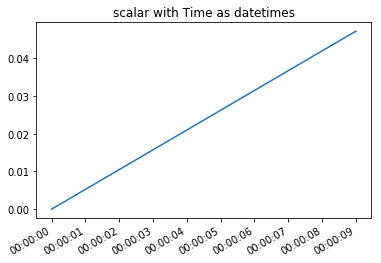

In [3]:
# Get data for use below
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime
%matplotlib inline

# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data['Time']),data['scalar'])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes')

## Pandas

,x,y,z
Time,,,
1970-01-01 00:00:00,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08,0.041876,-0.676876,-0.999123


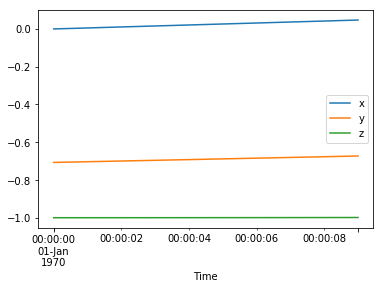

In [4]:
# Get data for use below
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

import pandas
# Create dataframe
df = pandas.DataFrame(data['vector'])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data['Time'])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['x', 'y', 'z']

display(df)

%matplotlib inline
df.plot()

## hapiplotserver

The plots created by `hapiplot` can be served using `hapiplotserver`.

A running instance is available at [http://hapi-server.org/plot]([http://hapi-server.org/plot).

### Start in Python

In [5]:
import time
import webbrowser
from multiprocessing import Process
from hapiclient import hapiplotserver

PORT = 5002
kwargs = {'port': PORT, 'loglevel': 'debug'}
process = Process(target=hapiplotserver, kwargs=kwargs)
process.start()
print(" * Sleeping for 1 second while server starts.")
time.sleep(1)
webbrowser.open('http://127.0.0.1:' + str(PORT) + "/", new=2)

input("Press Enter to terminate server ...")
print("Terminating server ...")
process.terminate()
print("Server terminated.")

 * Starting server for http://127.0.0.1:5002/
 * See http://127.0.0.1:5002/ for API description.
 * Cache directory: /tmp/hapi-data
 * Serving Flask app "hapiclient.plotserver.hapiplotserver" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5002/ (Press CTRL+C to quit)


 * Sleeping for 1 second while server starts.


127.0.0.1 - - [27/Nov/2018 21:59:49] "GET / HTTP/1.1" 304 -


hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): Writing dataset1.json 
hapi(): Writing dataset1.pkl 
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/TestData/hapi/data?id=dataset1&parameters=scalar&time.min=1970-01-01Z&time.max=1970-01-01T00:00:11Z&format=binary to dataset1_scalar_19700101_19700101T000011.bin
hapi(): Reading dataset1_scalar_19700101_19700101T000011.bin
hapi(): Writing hapi-server.org_servers_TestData_hapi/dataset1_scalar_19700101_19700101T000011.pkl
hapi(): Writing hapi-server.org_servers_TestData_hapi/dataset1_scalar_19700101_19700101T000011.npy
hapiplotserver.image(): Time for hapi() call = 0.590119
hapiplot(): Plotting parameter 'scalar'
hapiplotserver.image(): Time for hapiplot() call = 0.378431


127.0.0.1 - - [27/Nov/2018 21:59:53] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&time.min=1970-01-01Z&time.max=1970-01-01T00:00:11Z&transparent=false HTTP/1.1" 200 -


hapiplotserver.main(): Found ViViz at /tmp/hapi-data/viviz
Writing /tmp/hapi-data/viviz/catalogs/hapi-server.org_servers_TestData_hapi_dataset1.json
hapiplotserver.catalog(): Appending to /tmp/hapi-data/viviz/index.js


127.0.0.1 - - [27/Nov/2018 21:59:58] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&format=gallery HTTP/1.1" 302 -
127.0.0.1 - - [27/Nov/2018 21:59:58] "GET /viviz/index.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 21:59:58] "GET /viviz/catalogs/user.json HTTP/1.1" 304 -
127.0.0.1 - - [27/Nov/2018 21:59:58] "GET /viviz/catalogs/hapi-server.org_servers_TestData_hapi_dataset1.json HTTP/1.1" 200 -


hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): Writing dataset1.json 
hapi(): Writing dataset1.pkl 
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/TestData/hapi/data?id=dataset1&parameters=scalar&time.min=1970-01-01T00:00:00.000Z&time.max=1970-01-01T23:59:59.999Z&format=binary to dataset1_scalar_19700101T000000000_19700101T235959999.bin
hapi(): Reading dataset1_scalar_19700101T000000000_19700101T235959999.bin
hapi(): Writing hapi-server.org_servers_TestData_hapi/dataset1_scalar_19700101T000000000_19700101T235959999.pkl
hapi(): Writing hapi-server.org_servers_TestData_hapi/dataset1_scalar_19700101T000000000_19700101T235959999.npy
hapiplotserver.image(): Time for hapi() call = 2.253972
hapiplot(): Plotting parameter 'scalar'
hapiplotserver.image(): Time for hapiplot() c

127.0.0.1 - - [27/Nov/2018 22:00:01] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-01T00:00:00.000Z&time.max=1970-01-01T23:59:59.999Z HTTP/1.1" 200 -


hapi(): Running hapi.py version 0.0.6
hapi(): Running hapi.py version 0.0.6
hapi(): Running hapi.py version 0.0.6
hapi(): Running hapi.py version 0.0.6
hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): hapi(): file directory = hapi-server.org_servers_TestData_hapi
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): Reading http://hapi-server.org/servers/TestData/hapi/info?id=dataset1
hapi(): Running hapi.py version 0.0.6
hapi(): hapi(): file direct

127.0.0.1 - - [27/Nov/2018 22:00:06] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-04T00:00:00.000Z&time.max=1970-01-04T23:59:59.999Z HTTP/1.1" 200 -


hapi(): Reading dataset1_scalar_19700107T000000000_19700107T235959999.bin
hapi(): Writing hapi-server.org_servers_TestData_hapi/dataset1_scalar_19700107T000000000_19700107T235959999.pkl
hapi(): Writing hapi-server.org_servers_TestData_hapi/dataset1_scalar_19700107T000000000_19700107T235959999.npy
hapiplot(): Plotting parameter 'scalar'
hapiplotserver.image(): Time for hapi() call = 4.812139
hapiplot(): Plotting parameter 'scalar'
hapiplotserver.image(): Time for hapiplot() call = 2.690675


127.0.0.1 - - [27/Nov/2018 22:00:07] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-05T00:00:00.000Z&time.max=1970-01-05T23:59:59.999Z HTTP/1.1" 200 -


hapiplotserver.image(): Time for hapiplot() call = 2.814356


127.0.0.1 - - [27/Nov/2018 22:00:08] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-06T00:00:00.000Z&time.max=1970-01-06T23:59:59.999Z HTTP/1.1" 200 -


hapiplotserver.image(): Time for hapiplot() call = 2.944065


127.0.0.1 - - [27/Nov/2018 22:00:08] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-03T00:00:00.000Z&time.max=1970-01-03T23:59:59.999Z HTTP/1.1" 200 -


hapiplotserver.image(): Time for hapiplot() call = 2.992079


127.0.0.1 - - [27/Nov/2018 22:00:09] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-02T00:00:00.000Z&time.max=1970-01-02T23:59:59.999Z HTTP/1.1" 200 -


hapiplotserver.image(): Time for hapiplot() call = 2.474692


127.0.0.1 - - [27/Nov/2018 22:00:09] "GET /?server=http://hapi-server.org/servers/TestData/hapi&id=dataset1&parameters=scalar&usecache=true&format=png&time.min=1970-01-07T00:00:00.000Z&time.max=1970-01-07T23:59:59.999Z HTTP/1.1" 200 -


Press Enter to terminate server ...
Terminating server ...
Server terminated.


###  Start on Cmd Line

To run a local server, find the location of `hapiplotserver.py` by entering


```python
>>> import os; os.path.realpath('hapiplotserver.py')
```

on a Python command line. Then execute

```
cd /path/listed/above; python hapiplotserver.py --help
```

# Metadata

The metadata returned by `hapi()` is a straightforward mapping of the JSON metadata from a HAPI server.

## Servers

Equivalent URL: https://github.com/hapi-server/data-specification/blob/master/servers.txt

In [6]:
from hapiclient import hapi

servers = hapi() # servers is an array of URLs
display(servers)

['http://hapi-server.org/servers/TestData/hapi',
 'http://hapi-server.org/servers/SSCWeb/hapi',
 'http://datashop.elasticbeanstalk.com/hapi',
 'https://cdaweb.gsfc.nasa.gov/hapi',
 'http://planet.physics.uiowa.edu/das/das2Server/hapi',
 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi']

## Server datasets

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/catalog

In [7]:
from hapiclient import hapi

server = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server)

display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'catalog': [{'id': 'A1_K0_MPA'},
  {'id': 'A2_K0_MPA'},
  {'id': 'AC_AT_DEF'},
  {'id': 'AC_H0_MFI'},
  {'id': 'AC_H0_SWE'},
  {'id': 'AC_H1_EPM'},
  {'id': 'AC_H1_MFI'},
  {'id': 'AC_H1_SIS'},
  {'id': 'AC_H2_CRIS'},
  {'id': 'AC_H2_EPM'},
  {'id': 'AC_H2_MFI'},
  {'id': 'AC_H2_SEP'},
  {'id': 'AC_H2_SIS'},
  {'id': 'AC_H2_SWE'},
  {'id': 'AC_H2_SWI'},
  {'id': 'AC_H2_ULE'},
  {'id': 'AC_H3_CRIS'},
  {'id': 'AC_H3_EPM'},
  {'id': 'AC_H3_MFI'},
  {'id': 'AC_H3_SW2'},
  {'id': 'AC_H3_SWI'},
  {'id': 'AC_H4_SWI'},
  {'id': 'AC_H5_SWI'},
  {'id': 'AC_H6_SWI'},
  {'id': 'AC_K0_EPM'},
  {'id': 'AC_K0_MFI'},
  {'id': 'AC_K0_SIS'},
  {'id': 'AC_K0_SWE'},
  {'id': 'AC_K1_EPM'},
  {'id': 'AC_K1_MFI'},
  {'id': 'AC_K1_SWE'},
  {'id': 'AC_K2_MFI'},
  {'id': 'AC_OR_DEF'},
  {'id': 'AC_OR_SSC'},
  {'id': 'BAR_1A_L2_EPHM'},
  {'id': 'BAR_1A_L2_FSPC'},
  {'id': 'BAR_1A_L2_MAGN'},
  {'id': 'BAR_1A_L2_MSPC'},
  {'id': 'BAR_1A_L2_RCNT'},
  {'i

## Dataset  parameters

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI

In [8]:
from hapiclient import hapi

server  = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset = 'AC_H0_MFI'
meta = hapi(server,dataset)
display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude'},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3]},
  {'name': 'BGSM',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic field vector in GSM coordinates (16 sec)',
   'size': [3]},
  {'name': 'dBrms',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'RMS of Magnetic Field (16 sec period)'},
  {'name': 'SC_pos_GSE',
   'type': 'double',
   'units': 'km',
   'fill': '-1.0E31',
   'description': 'ACE s/c position, 3 comp. in GSE coord.',
   'size': [3]},
  {'name': 'SC_pos_GSM',
   'type': 'double',
   'unit

## Parameters

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc

(Except for the addition of internal keys that prefixed by `x_`.)

In [9]:
from hapiclient import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'Magnitude,BGSEc'

meta = hapi(server,dataset,parameters)

display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude'},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3]}],
 'startDate': '1997-09-02T00:00:12Z',
 'stopDate': '2018-08-10T23:59:51Z',
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'AC_H0_MFI'}